📊 EDA Key Observations — SalesConversions Dataset
1. Data Shape and Structure
Dataset has a moderate number of records (thousands of leads).

Contains both numerical and categorical columns.

Target variable: Converted (binary: 0 = not converted, 1 = converted).

2. Missing Values
Certain columns like Lead Profile, Specialization, and How did you hear about X Education have a high percentage of missing values (> 30%).

These columns may need to be dropped or imputed during preprocessing.

ID-like columns (Prospect ID, Lead Number) were dropped due to no predictive value.

3. Duplicates
No duplicate rows were found.

4. Target Variable (Converted)
Class imbalance observed: The majority class is "Not Converted".

Will likely require balancing techniques like SMOTE, class weights, or undersampling.

5. Numerical Feature Distribution
Features like TotalVisits, Total Time Spent on Website, and Page Views Per Visit are right-skewed.

Outliers are present in these features and will need to be handled in preprocessing.

Users who spent more time and had more visits tend to convert more.

6. Categorical Feature Analysis
Columns like Lead Origin, Last Activity, and Lead Source have many categories (some high cardinality).

Some categories are highly imbalanced and may be grouped or encoded carefully.

Values like "Select Specialization" and "Unknown" are placeholders — should be cleaned or imputed.

7. Correlation Insights
No high correlations between numerical features (no multicollinearity).

Total Time Spent on Website shows mild positive correlation with conversion.

8. Outliers
Boxplots show outliers in TotalVisits, Page Views Per Visit, etc.

Consider capping, log transforms, or removal depending on their influence.

9. Potential Data Leakage
Columns like Tags, Lead Quality, and Last Notable Activity may leak post-conversion information and should be excluded from training.

10. Initial Feature Importance (from EDA Perspective)
Total Time Spent on Website, Last Activity, and Lead Origin appear to be important features.

These will be validated later with feature importance during modeling.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load your dataset
df = pd.read_csv("../data/raw/Lead Scoring.csv")
df.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2]:
df_subset = df.head(15)

# Convert headers to lowercase and remove spaces
df_subset.columns = [col.lower().replace(' ', '') for col in df_subset.columns]

# Save to a new CSV file
df_subset.to_csv('cleaned_first_15_rows.csv', index=False)

In [2]:
 # Rows and columns
df.shape 

(9240, 37)

In [3]:
df.columns    # List of features

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [4]:
df.dtypes # Data types of each column

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [5]:
df.describe()    # Summary stats (only for numeric)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
df.info() # Data types + missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
df.isnull().sum().sort_values(ascending=False)  # Count missing per column

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [8]:
df.isna().mean() * 100  # Percentage of missing values

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

<Axes: >

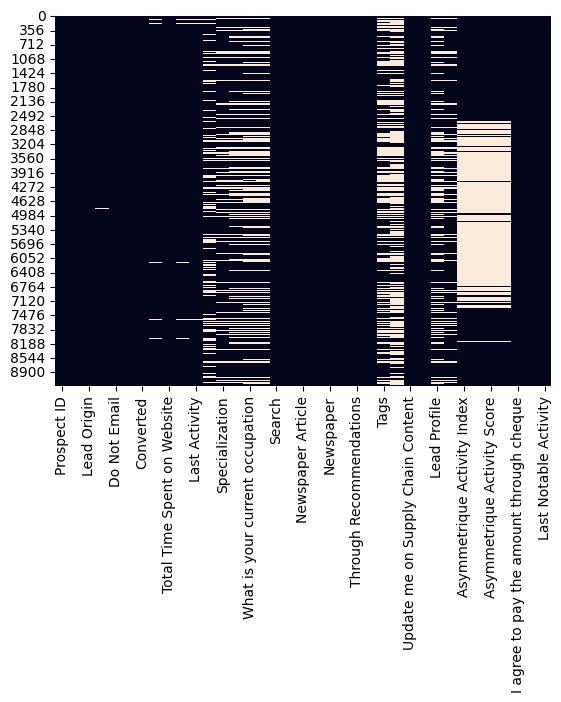

In [9]:
sns.heatmap(df.isnull(), cbar=False)     # Visualize missing pattern

In [10]:
print(df.duplicated().sum())   # Total duplicate rows
df.drop_duplicates(inplace=True)

0


<Axes: xlabel='Converted', ylabel='count'>

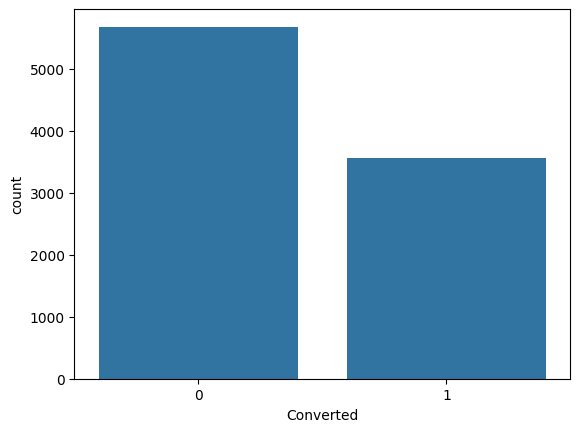

In [11]:
df['Converted'].value_counts(normalize=True) * 100
sns.countplot(x='Converted', data=df)

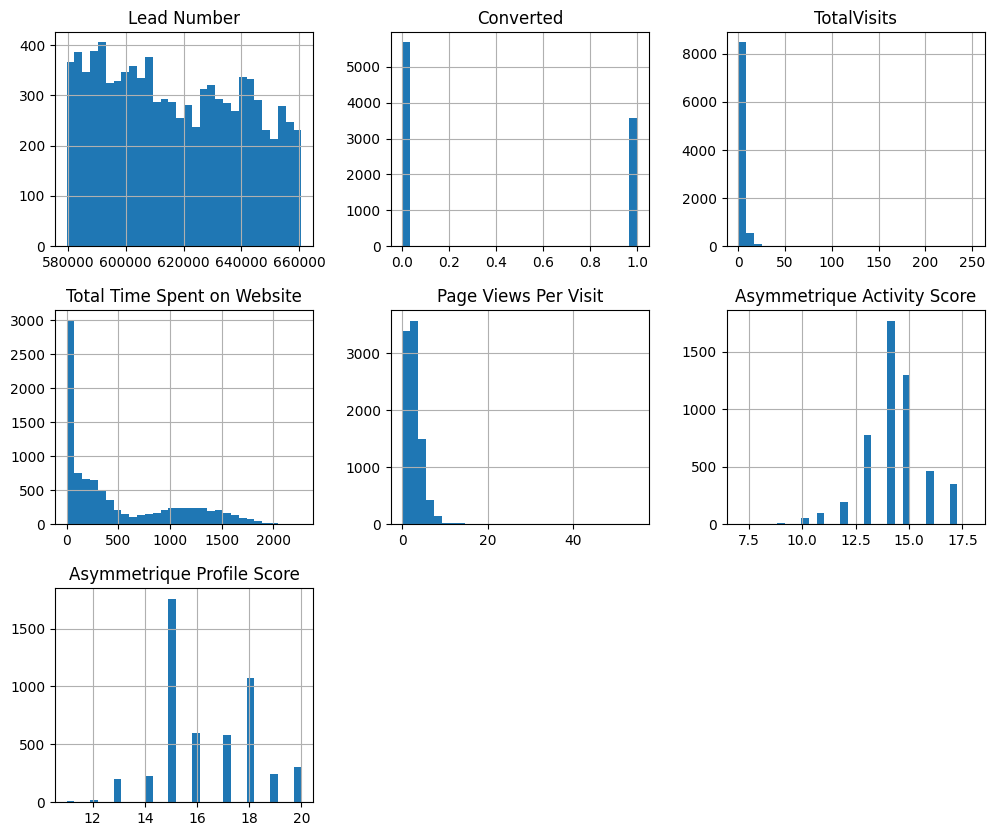

In [12]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols].hist(figsize=(12, 10), bins=30)
for col in num_cols:
    sns.boxplot(x='Converted', y=col, data=df)

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64


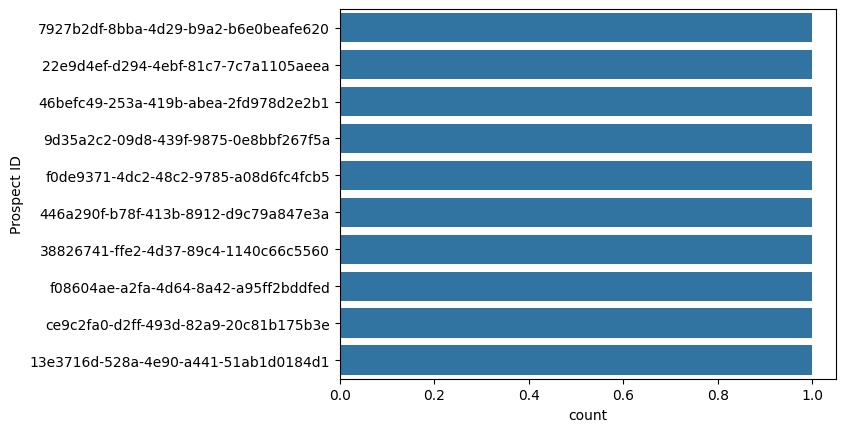

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


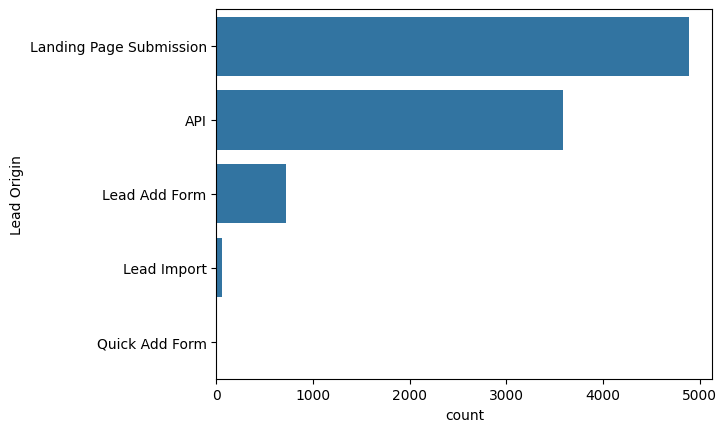

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64


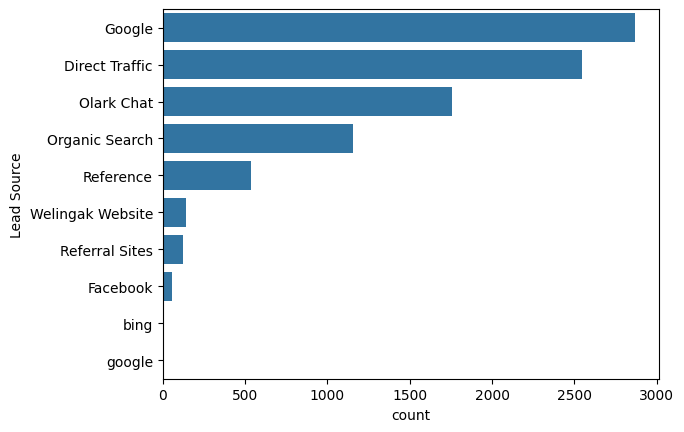

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64


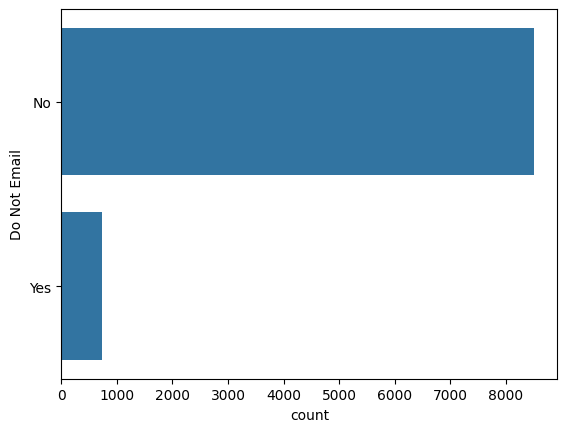

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64


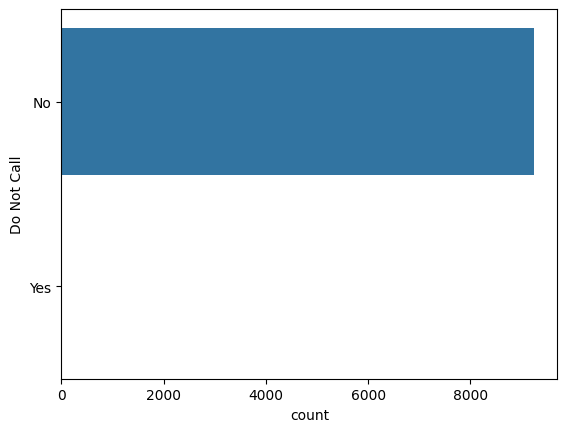

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64


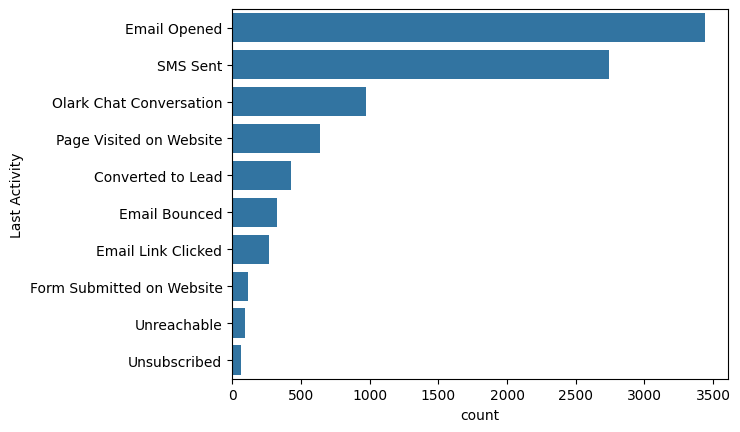

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

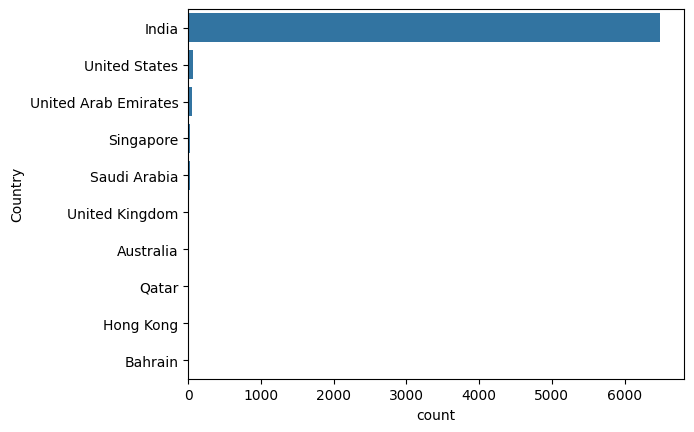

Specialization
Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64


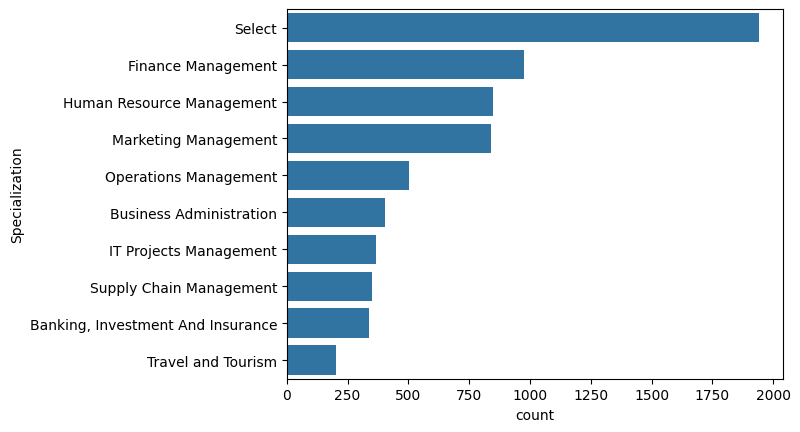

How did you hear about X Education
Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64


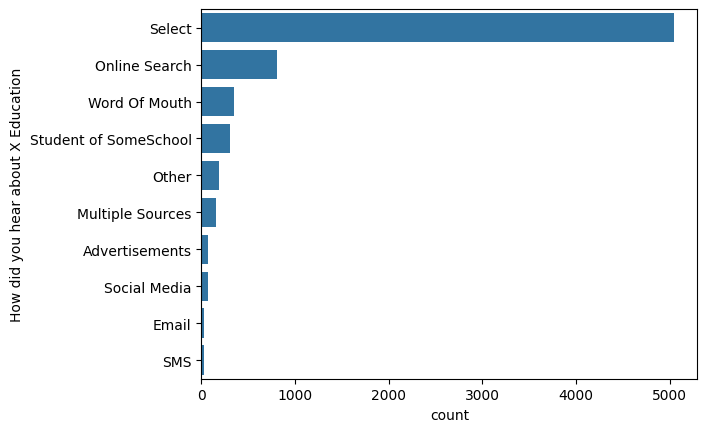

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64


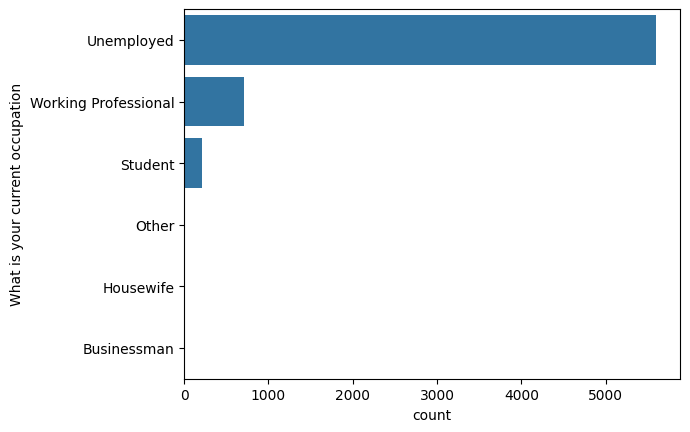

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64


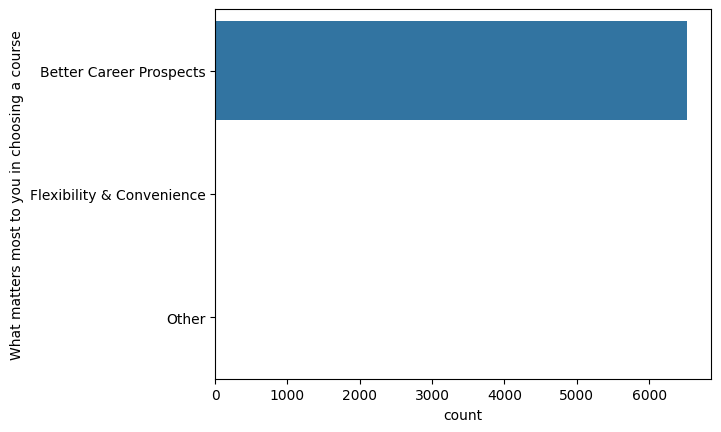

Search
No     9226
Yes      14
Name: count, dtype: int64


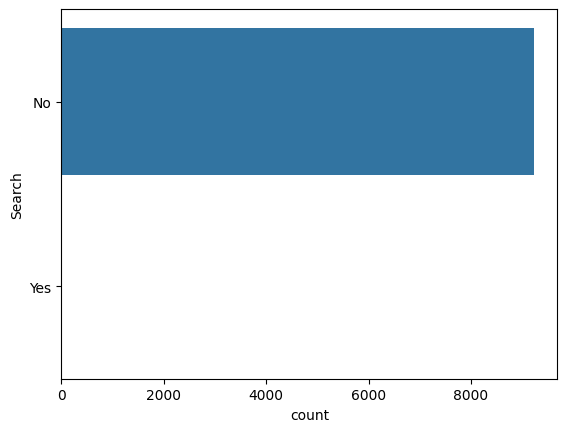

Magazine
No    9240
Name: count, dtype: int64


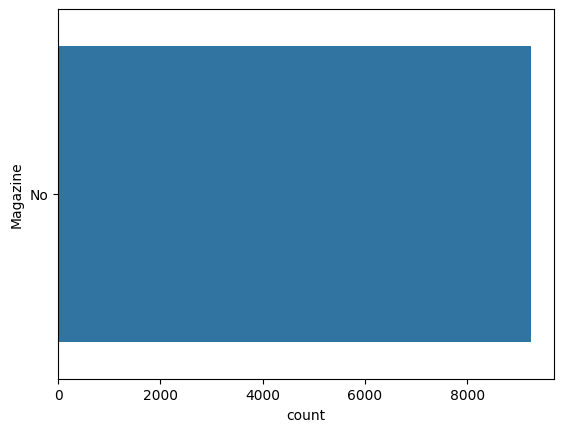

Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64


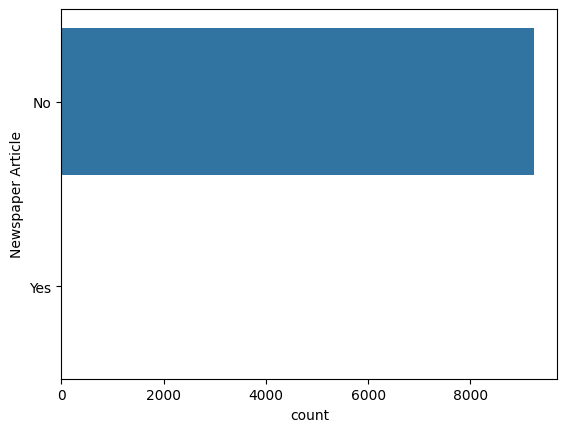

X Education Forums
No     9239
Yes       1
Name: count, dtype: int64


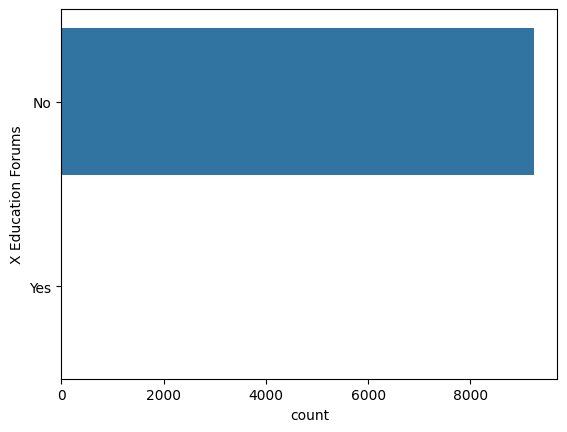

Newspaper
No     9239
Yes       1
Name: count, dtype: int64


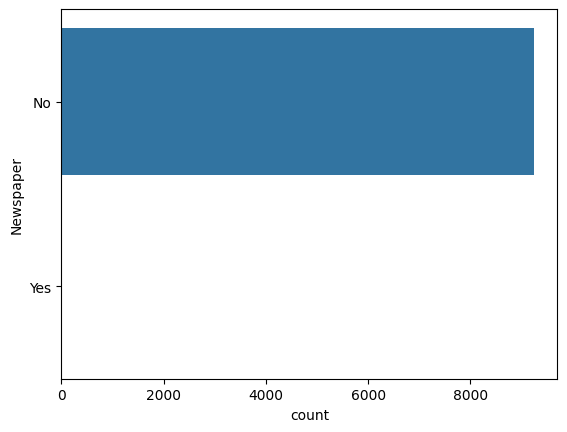

Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64


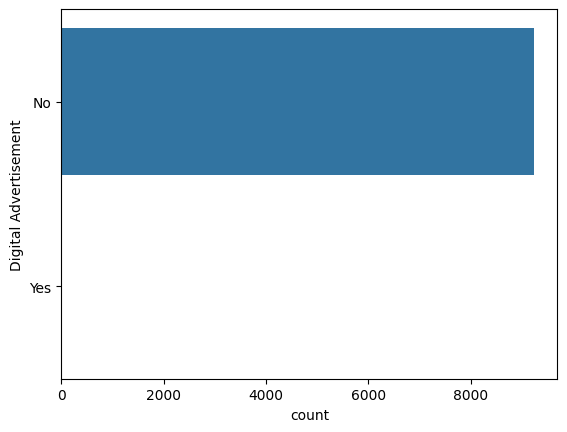

Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64


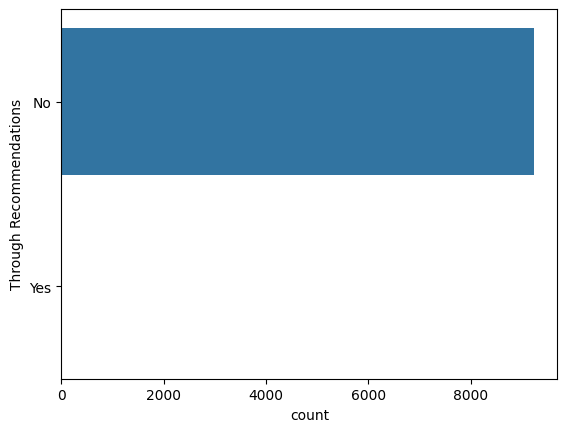

Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64


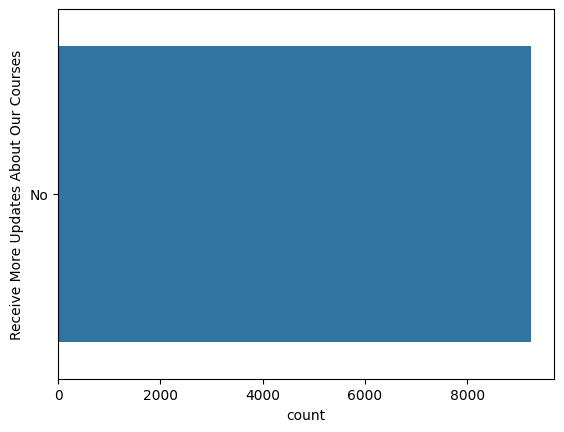

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

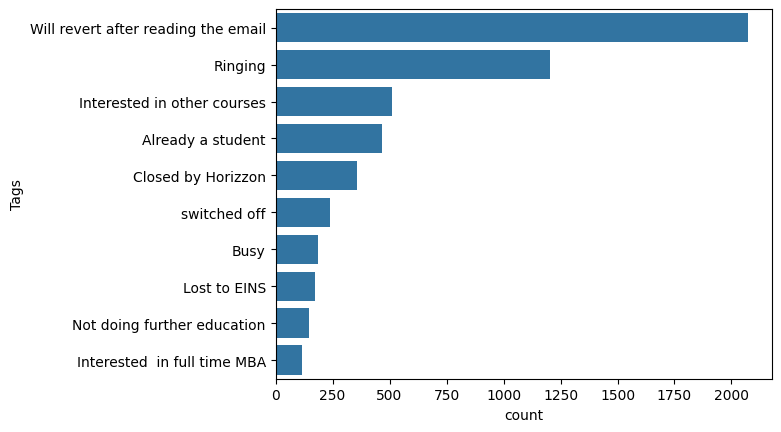

Lead Quality
NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64


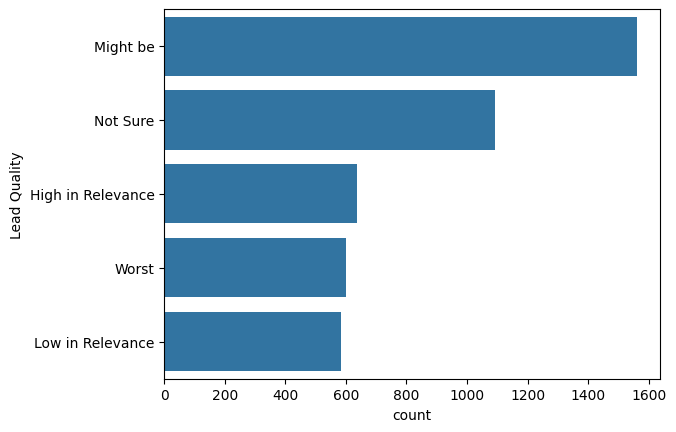

Update me on Supply Chain Content
No    9240
Name: count, dtype: int64


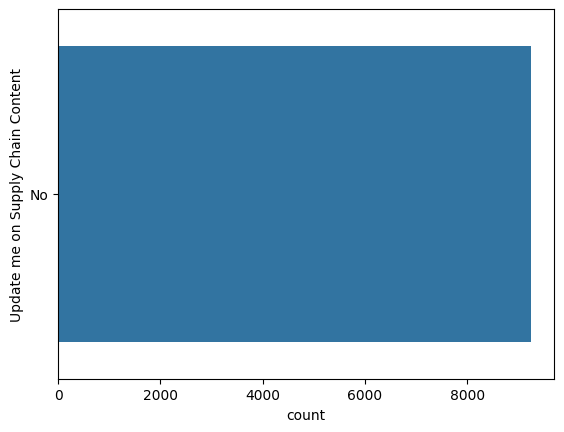

Get updates on DM Content
No    9240
Name: count, dtype: int64


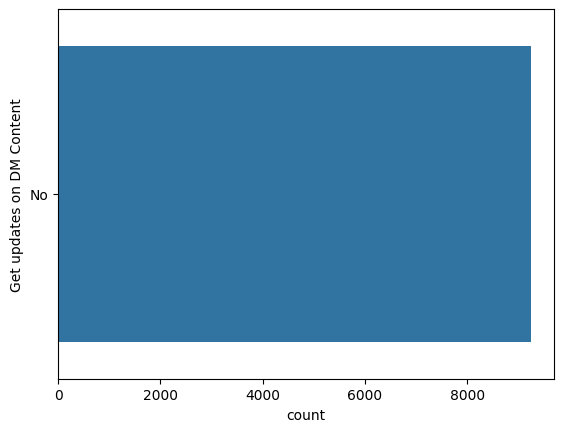

Lead Profile
Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64


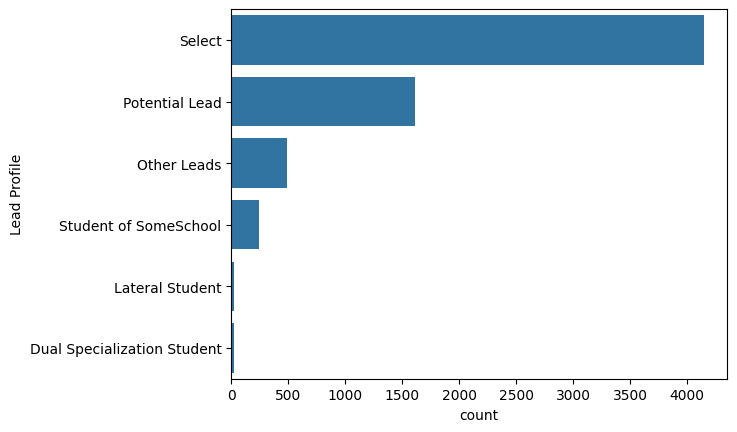

City
Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64


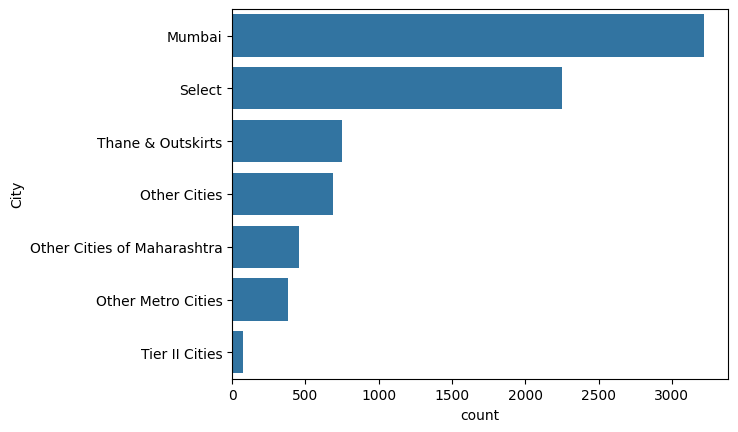

Asymmetrique Activity Index
NaN          4218
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64


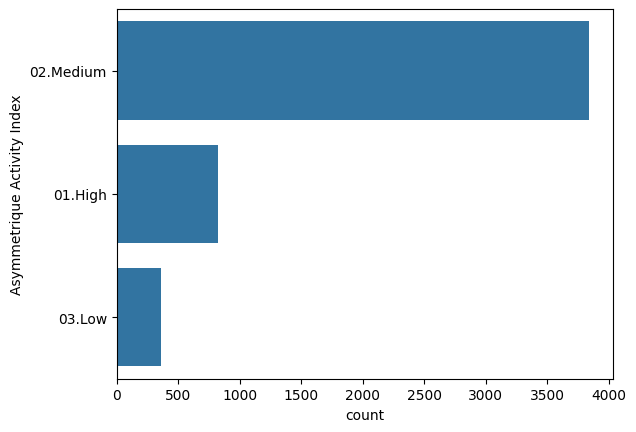

Asymmetrique Profile Index
NaN          4218
02.Medium    2788
01.High      2203
03.Low         31
Name: count, dtype: int64


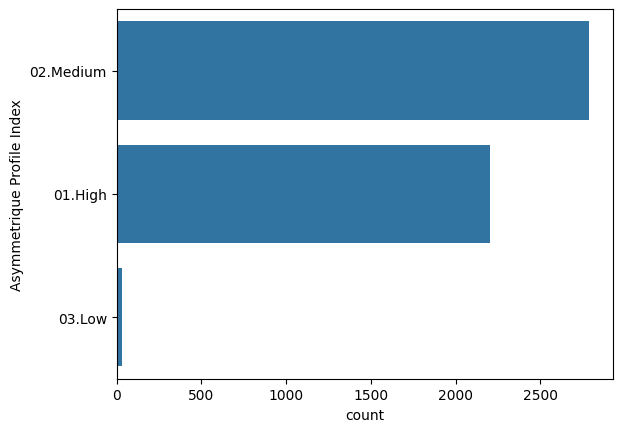

I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64


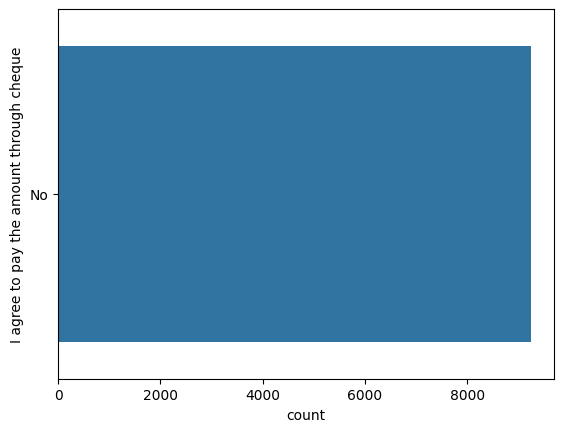

A free copy of Mastering The Interview
No     6352
Yes    2888
Name: count, dtype: int64


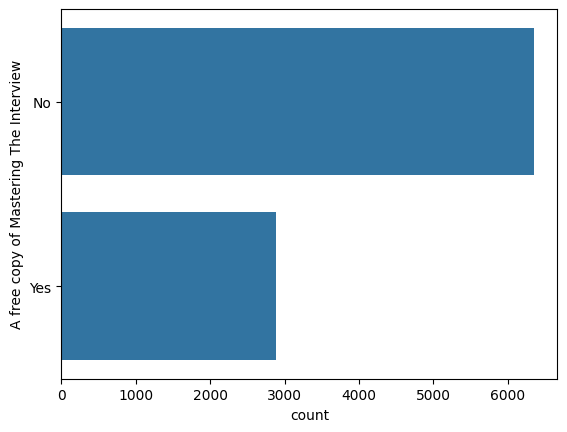

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64


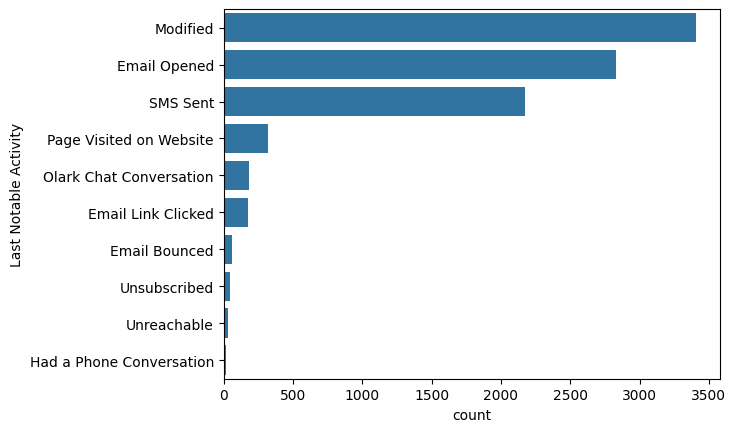

In [13]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(df[col].value_counts(dropna=False))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index[:10])
    plt.show()

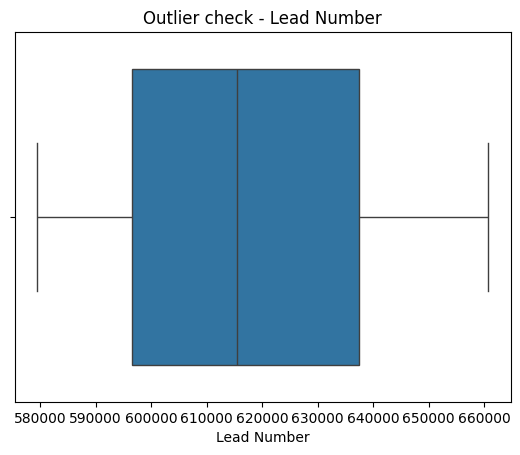

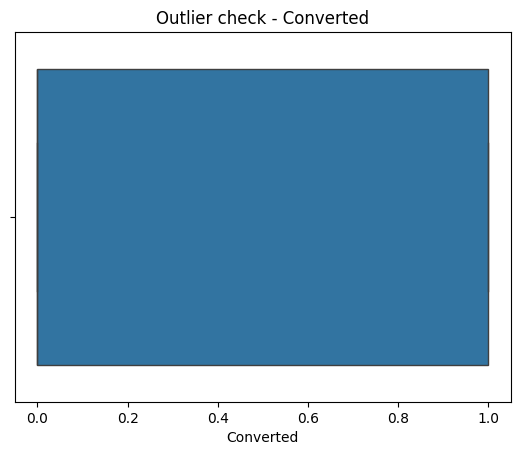

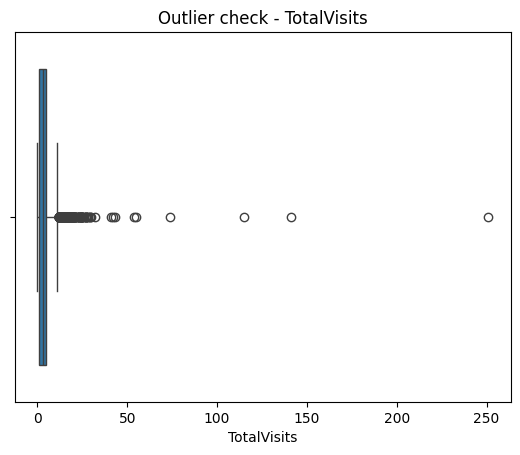

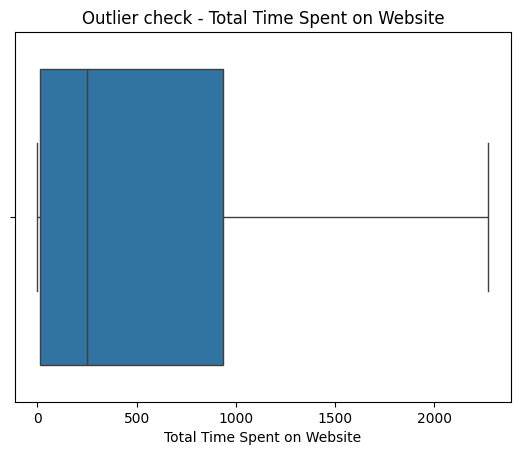

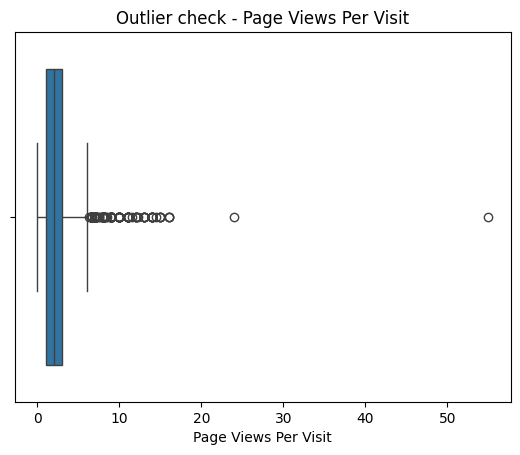

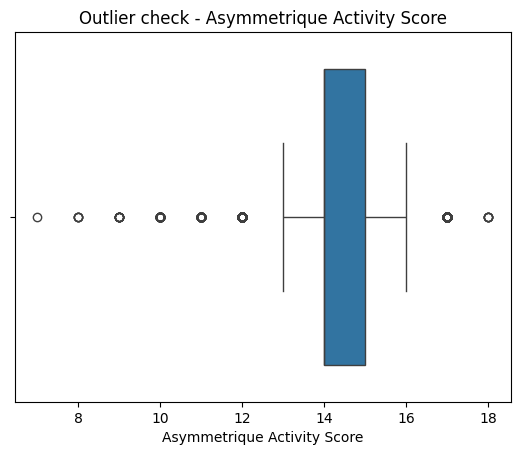

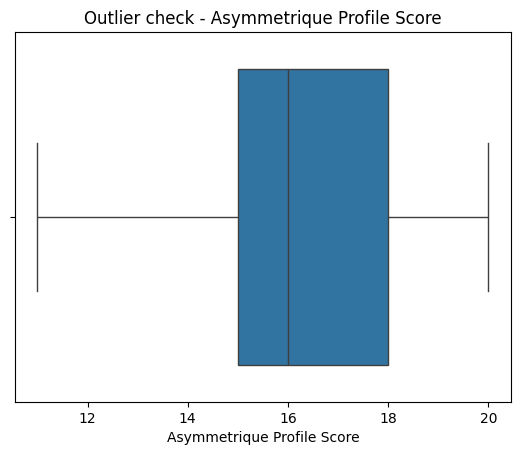

In [14]:
for col in num_cols:
    sns.boxplot(data=df, x=col)
    plt.title(f"Outlier check - {col}")
    plt.show()

<Axes: >

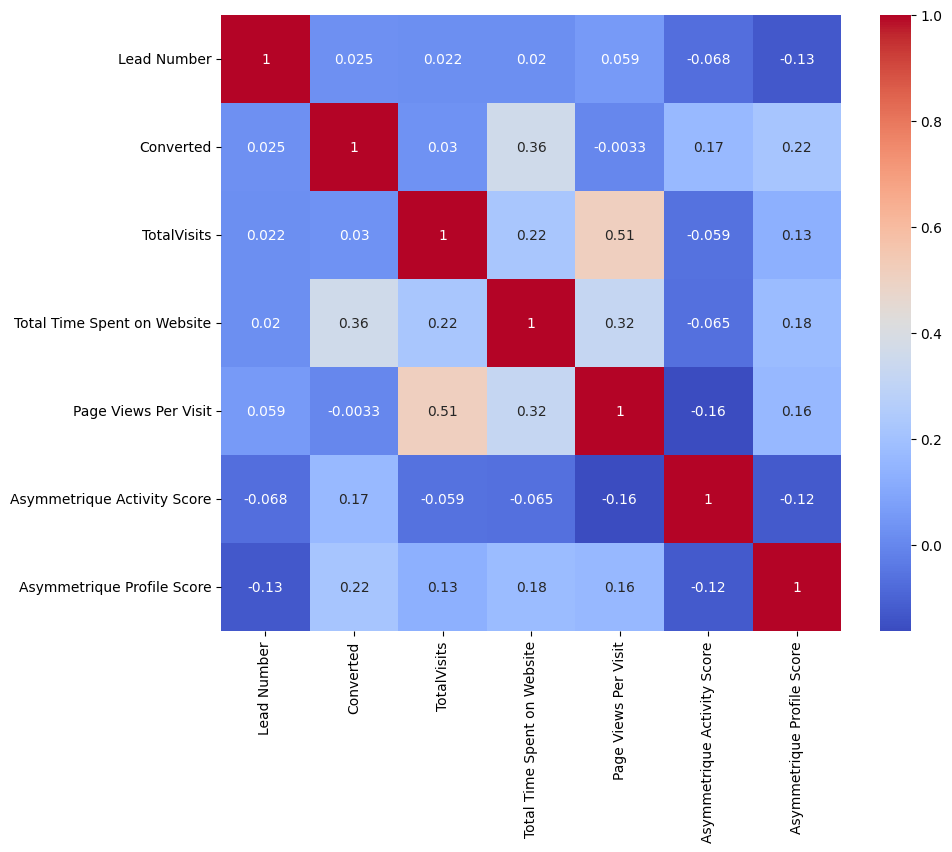

In [15]:
# Feature Correlation (Numerical Only)

corr = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

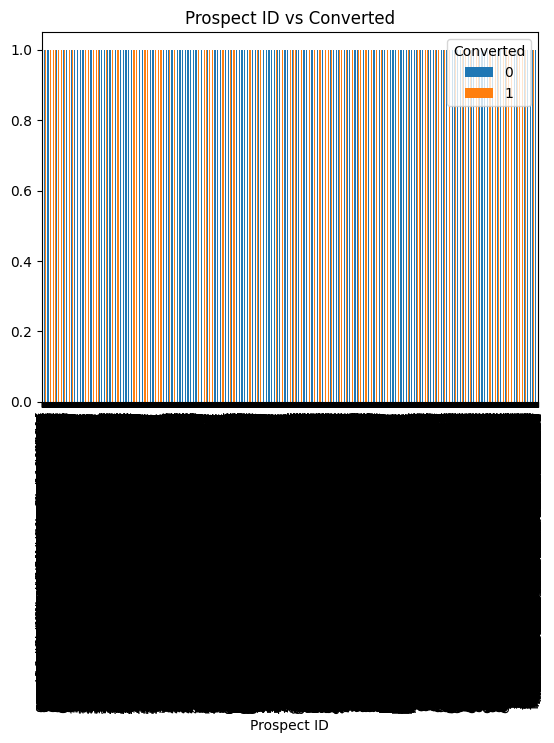

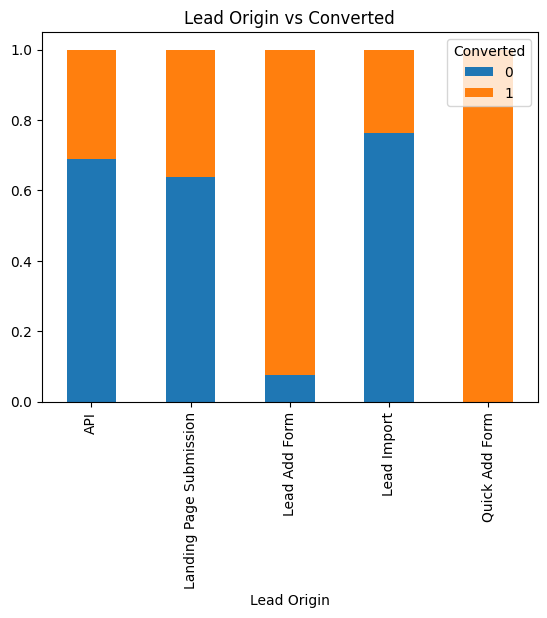

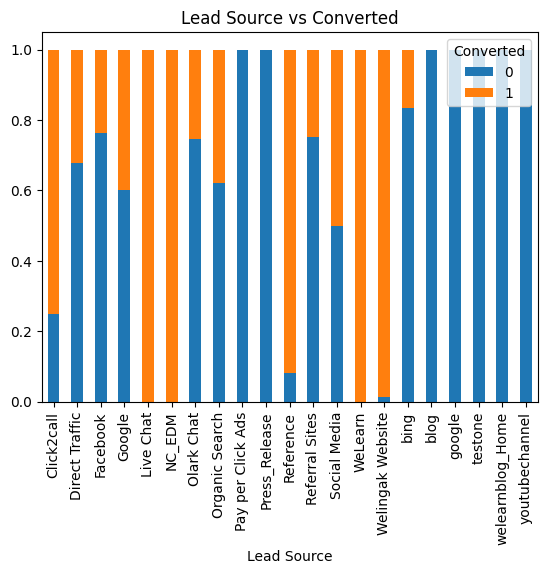

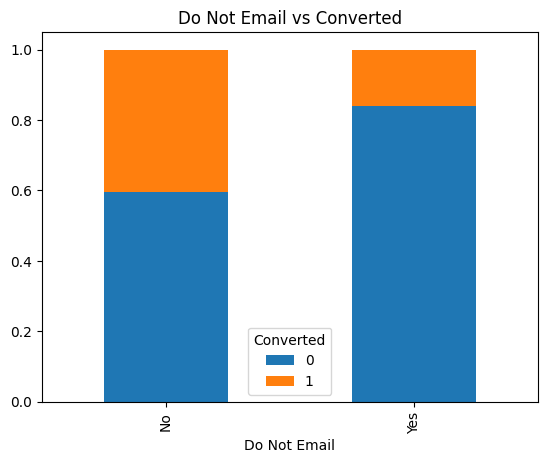

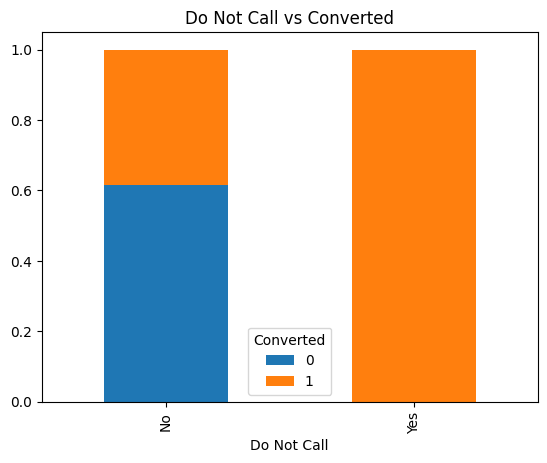

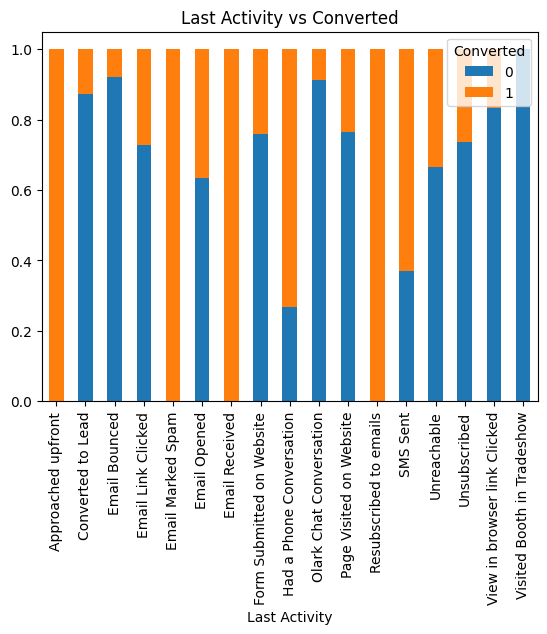

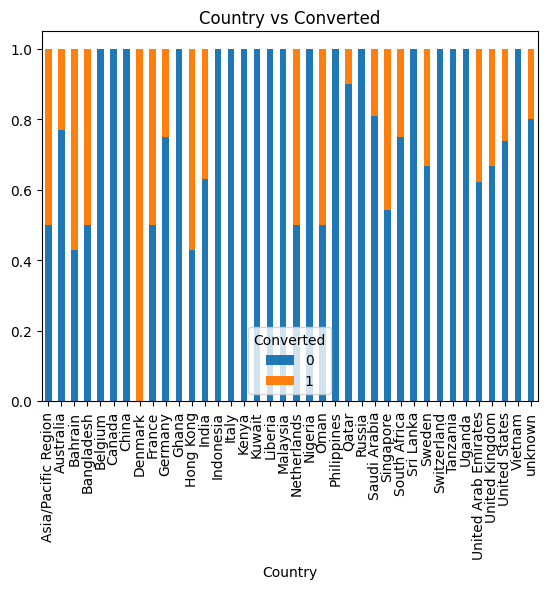

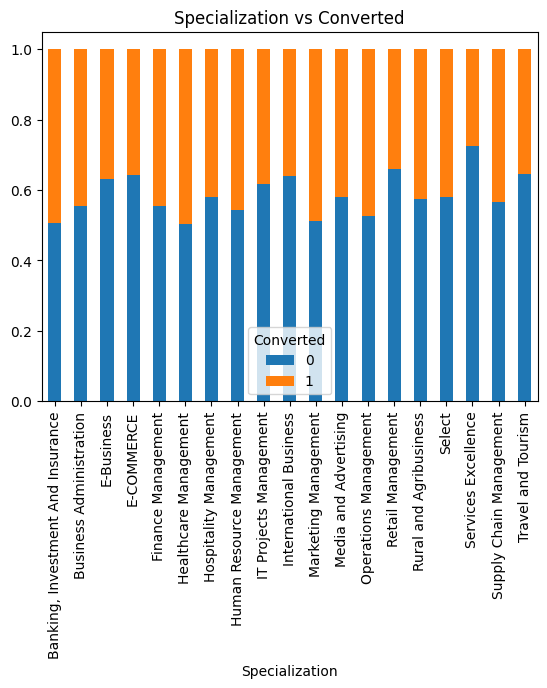

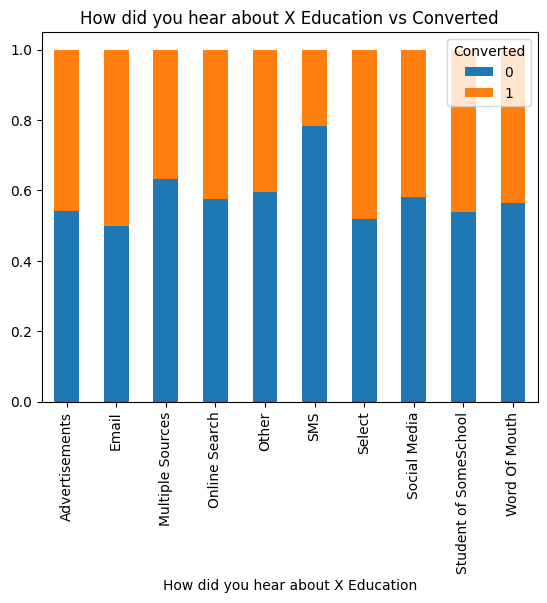

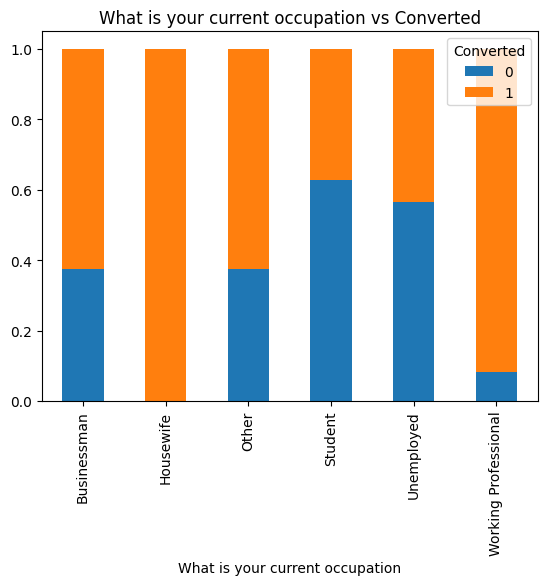

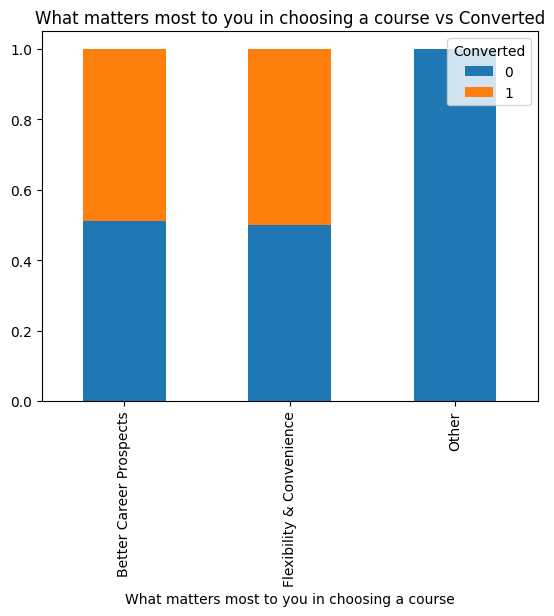

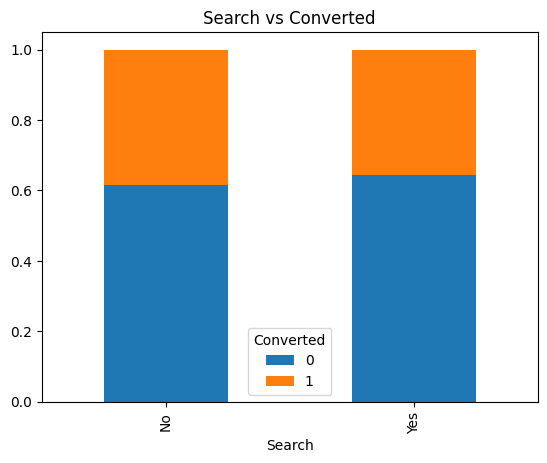

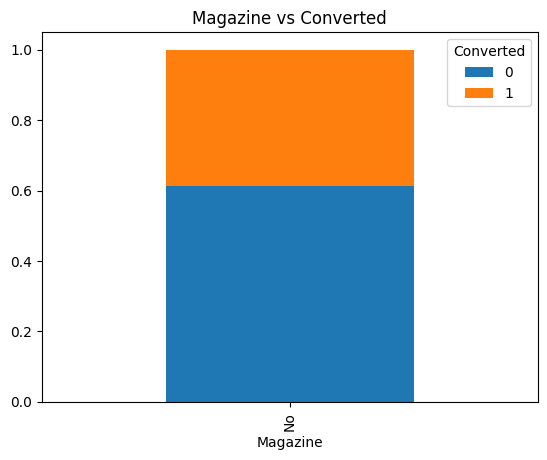

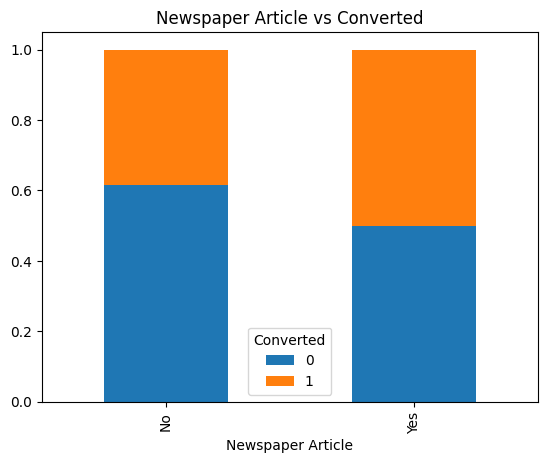

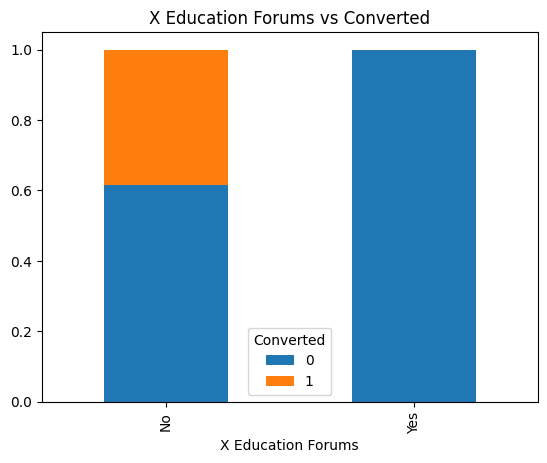

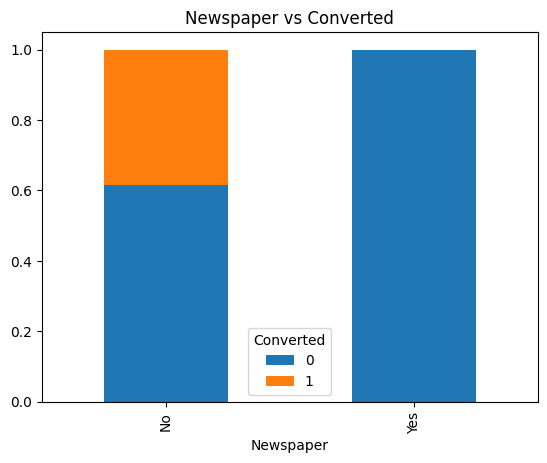

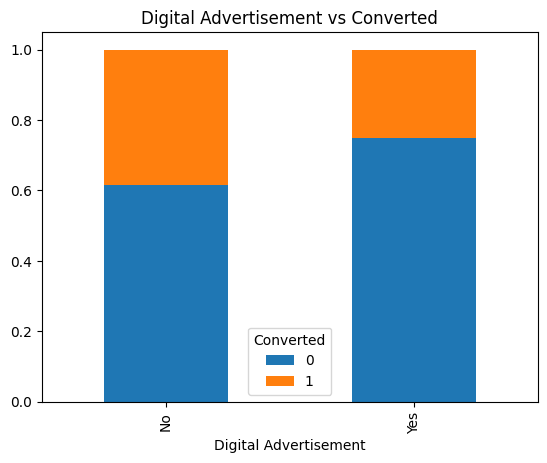

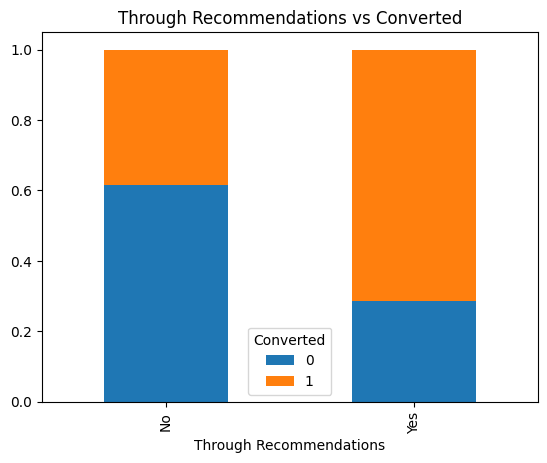

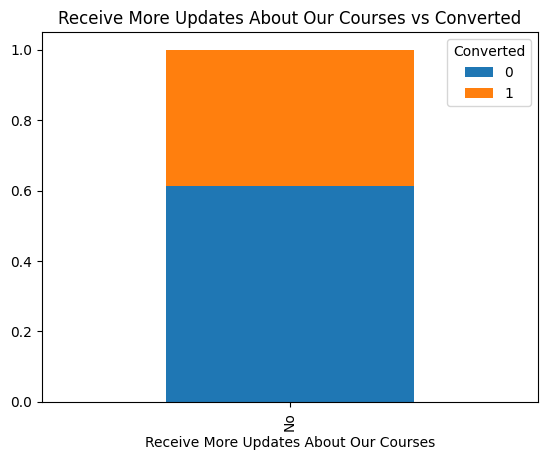

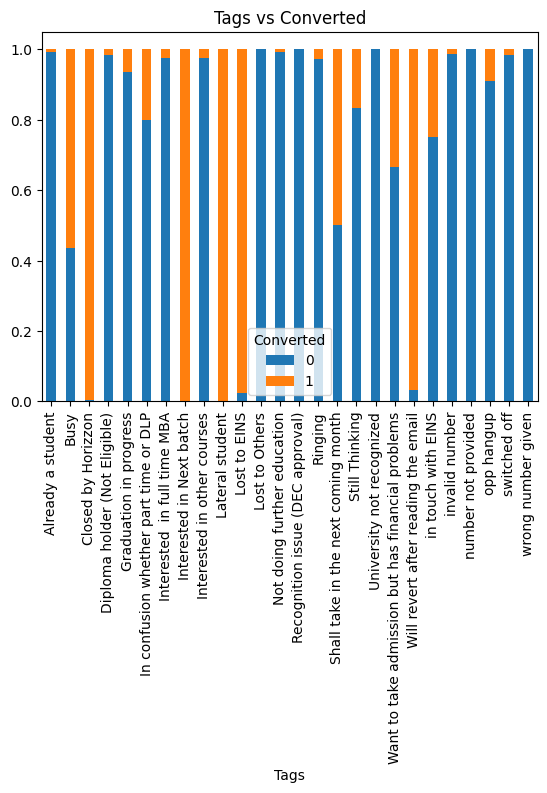

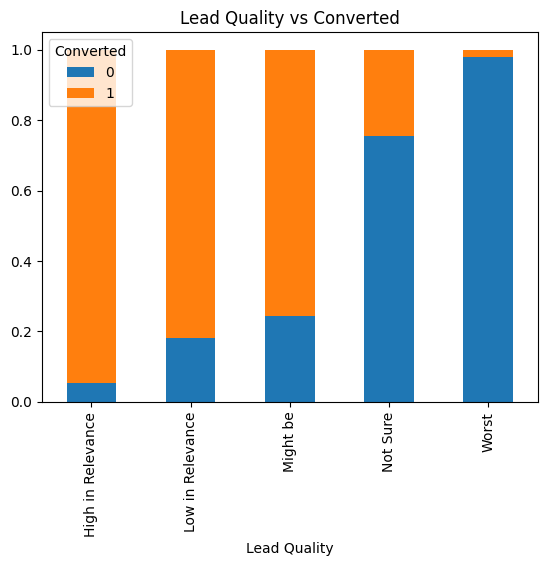

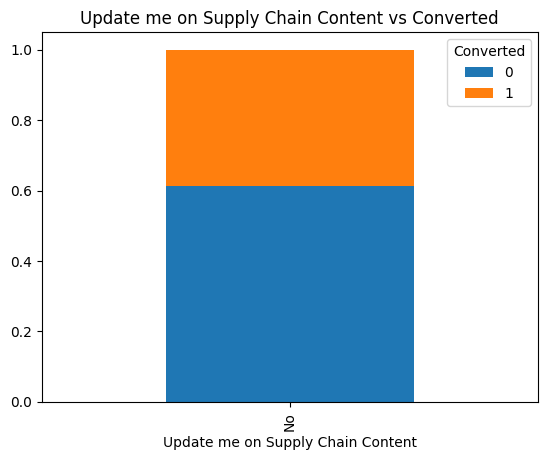

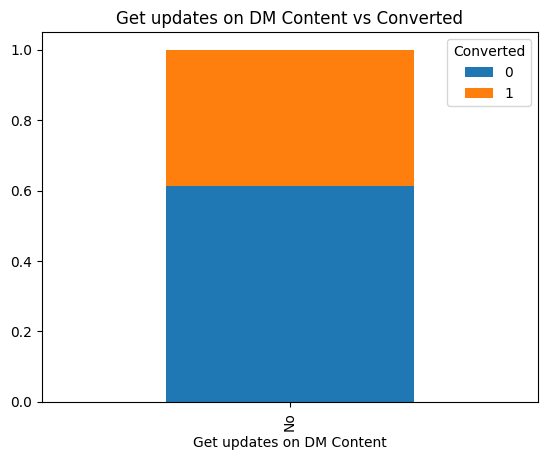

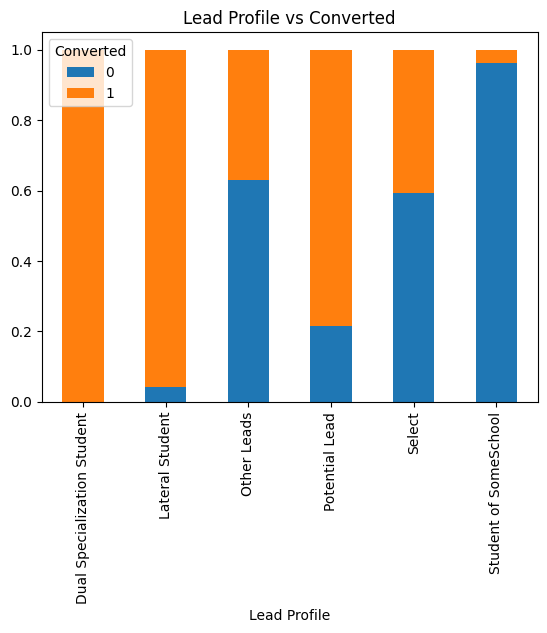

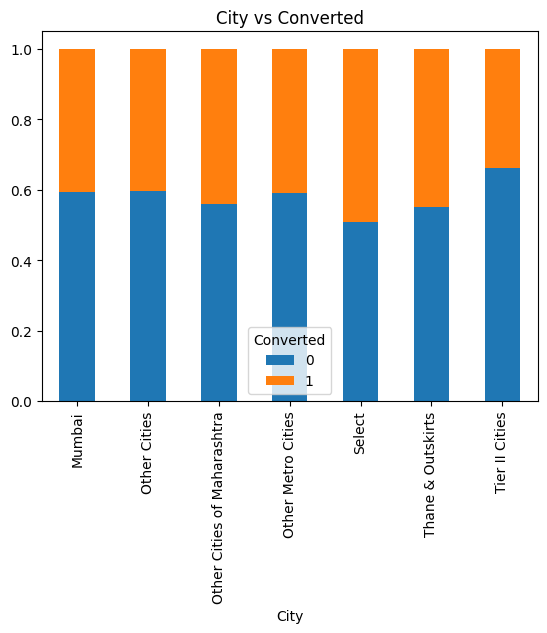

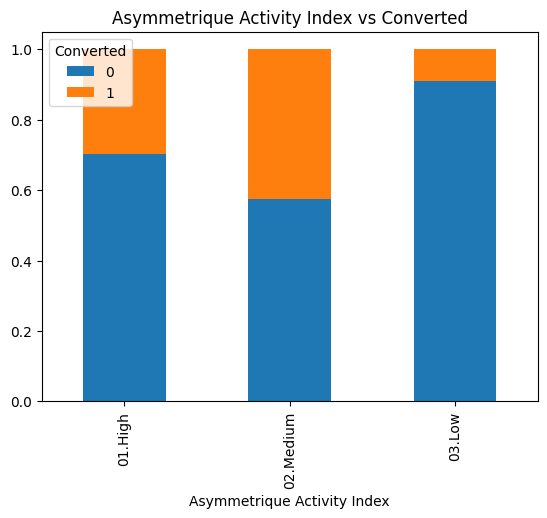

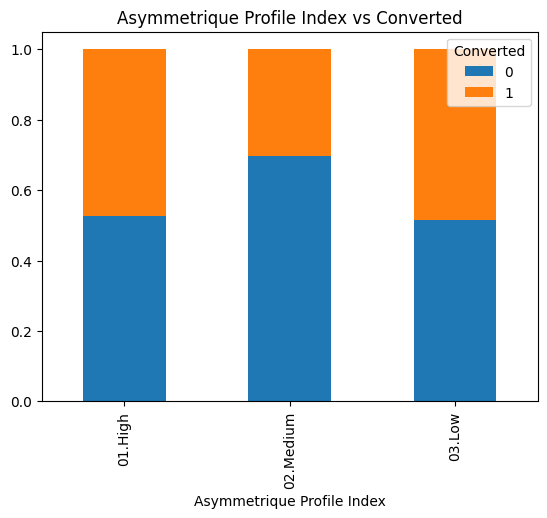

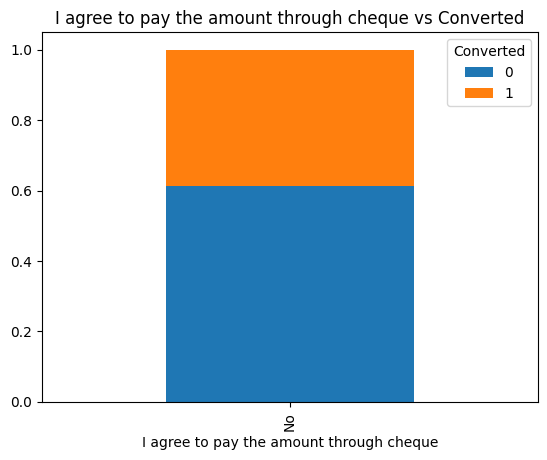

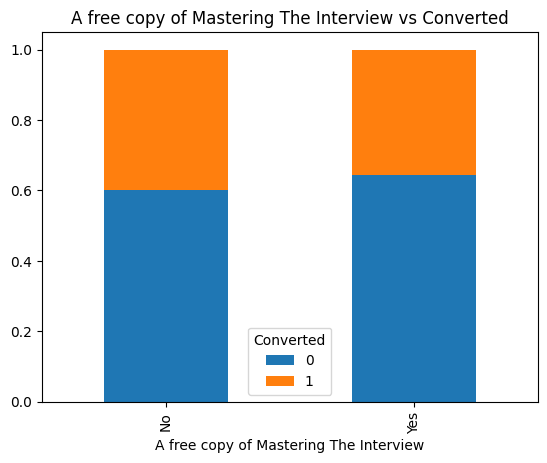

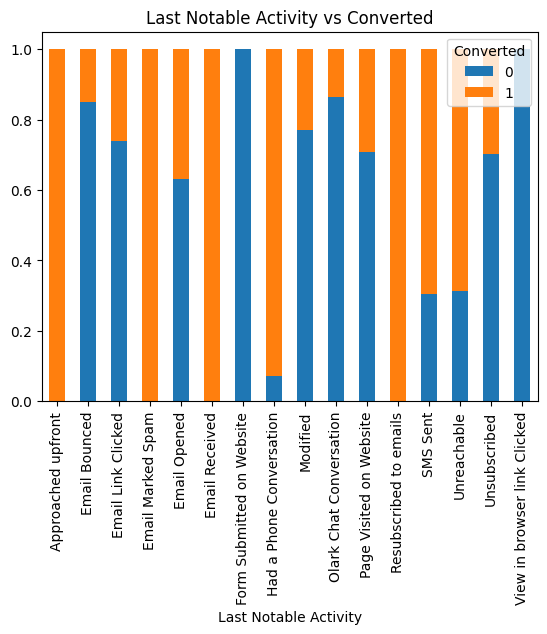

In [16]:
#  Bivariate Analysis (Target vs Features)
for col in cat_cols:
    ct = pd.crosstab(df[col], df['Converted'], normalize='index')
    ct.plot(kind='bar', stacked=True)
    plt.title(f'{col} vs Converted')
    plt.show()

In [17]:
# Remove ID columns (they’re not useful for analysis)
df.drop(columns=['Prospect ID', 'Lead Number'], inplace=True)


In [18]:
# Save for analysis only (not final preprocessing)
df.to_csv("../data/processed/eda_cleaned.csv", index=False)


In [21]:
import pandas as pd

def count_unique_in_categorical_columns(df):
    # Select only object (string) or category type columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        print(df[col].value_counts())
    # Get unique value counts for each categorical column
    unique_counts = df[cat_cols].nunique().sort_values(ascending=False)
    
    return unique_counts

# Example usage:
# df = pd.read_csv("your_file.csv")
print(count_unique_in_categorical_columns(df))


Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64
Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark

In [22]:
print(set(df.columns)-set(cat_cols))

{'Asymmetrique Profile Score', 'Page Views Per Visit', 'Converted', 'TotalVisits', 'Asymmetrique Activity Score', 'Total Time Spent on Website'}


In [23]:
# Save the first 5 rows (head) to a CSV file
df.head().to_csv('head_of_dataframe.csv', index=False)